<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br> FINAL PROJECT<br>Assignment 3 Part 1 [GROUP Assignment]</h1>

---
<br>

#### **Your Unis** : sc4040, ajh2259, fsa2139
#### **Your Full names** : Shayan Chowdhury, Andrew Hamilton, Faaz Saad Arshad
#### **Your AI Model Share Usernames**: sc4040, ajh2259, fsa2139
#### **Link to your Public Github repository** : https://github.com/fsarshad/NLPAdvMLHW3
#### **Team member Contribution Percentages** : 33.33%, 33.33%, 33.33%

## Stanford Sentiment Treebank - Movie Review Classification Competition

## **Instructions: [Total 15 Points for this part]**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn TFIDF Vectorizer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



## 1. Get data in and set up X_train, X_test, y_train objects

In [ ]:
#install aimodelshare library
! pip install aimodelshare

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 9

In [35]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/sst2_competition_data-repository:latest')


Data downloaded successfully.


In [80]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

X_train=pd.read_csv("sst2_competition_data/X_train.csv")
X_test=pd.read_csv("sst2_competition_data/X_test.csv")
y_train_labels=pd.read_csv("sst2_competition_data/y_train_labels.csv")


X_train.head()

text
0  The Rock is destined to be the 21st Century 's...
1  The gorgeously elaborate continuation of `` Th...
2  Singer/composer Bryan Adams contributes a slew...
3               Yet the act is still charming here .
4  Whether or not you 're enlightened by any of D...

In [37]:
def to_series(df):
    from tensorflow import keras
  from keras.preprocessing.text import Tokenizer
  if len(df.columns) == 1:
    seq = df.squeeze()
    return seq
  else:
    pass

##2.   Preprocess data and Analyze


In [82]:
# Build a Document-Term Matrix (DTM) out of words in the training set
# Remove stop words that occur too frequently to be useful, and
# Use Term Frequency - Inverse Document Frequency (TF-IDF) formula to weight by how common words are generally

def build_dtm(seq):
    from sklearn.feature_extraction.text import TfidfVectorizer

    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
    seq_tfidf = tfidf.fit_transform(seq)

    return seq_tfidf

In [39]:
# preprocessing functions to use in a utils.py file
def clean_text(text):
    import re
    import string
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

import nltk
nltk.download('stopwords')
def rem_sw(text_in):
    sw = nltk.corpus.stopwords.words('english')
    sent = [word for word in text_in.lower(
        ).split() if word not in sw]
    sent = ' '.join(sent)
    return sent

def stem_fun(text_in):
    from nltk.stem import PorterStemmer
    ps = PorterStemmer()
    sent = [ps.stem(word) for word in text_in.lower(
        ).split()]
    sent = ' '.join(sent)
    return sent

def to_series(df):
  #convert to series if there is only one column, else keep as dataframe.
  from tensorflow import keras
  from keras.preprocessing.text import Tokenizer
  if len(df.columns) == 1:
    seq = df.squeeze()
    return seq
  else:
    pass


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Write function to transform data with preprocessor
# New samples will be put into a DTM based on vocabularly from training set

def preprocessor(text):
    # convert to series
    text = to_series(text)
    # clean text
    text = text.apply(clean_text)
    # remove stopwords
    text = text.apply(rem_sw)
    # stem words
    text = text.apply(stem_fun)

    return text

In [41]:
print(preprocessor(X_train).shape)
print(preprocessor(X_test).shape)

(6920,)
(1821,)


Perform EDA and Visualizations (class balance, review lengths, word frequency per class, Wordcloud, etc)

In [ ]:
# class balance
y_labels_df = pd.DataFrame(y_train_labels)
balance_counts = y_labels_df.groupby('label')['label'].agg('count').values
balance_counts

array([3310, 3610])

In [ ]:
# class balance plot
from plotly import graph_objs as go
medium_blue = "#101BC1"
fulvous = "#DE8219"
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Negative'],
    y=[balance_counts[0]],
    name='negative',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=medium_blue
))
fig.add_trace(go.Bar(
    x=['Positive'],
    y=[balance_counts[1]],
    name='positive',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=fulvous
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by sentiment</span>'
)
fig.show()

Our training dataset appears to be balanced, with 48% of the sample labeled as negative sentiment and 52% of the sample labeled as positive sentiment. Since we have relative balance, We should be able to use this full training sample without bias issues.

In [ ]:
# review lengths
X_train_df = pd.DataFrame(X_train)
X_train_df['review_len'] = X_train_df['text'].apply(lambda x: len(x.split(' ')))
X_train_df['sentiment'] = y_train_labels

In [ ]:
# review lengths plot
positive_df = X_train_df[X_train_df['sentiment'] == 'Positive']['review_len'].value_counts().sort_index()
negative_df = X_train_df[X_train_df['sentiment'] == 'Negative']['review_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=positive_df.index,
    y=positive_df.values,
    name='positive',
    fill='tozeroy',
    marker_color=fulvous,
))
fig.add_trace(go.Scatter(
    x=negative_df.index,
    y=negative_df.values,
    name='negative',
    fill='tozeroy',
    marker_color=medium_blue,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Lengths of Movie Reviews by Sentiment</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

The distributions of lengths for samples from both sentiments (negative and positive) also show very similar shapes. This is also encouraging as, combined with the balanced number of samples in each sentiment group, it implies that the training sample we are working with is adequate for training our models without concern that the sample will produce bias towards one sentiment or another.  

In [ ]:
#install wordcloud library
! pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
X_train_df['clean'] = X_train_df['text'].apply(clean_text)

In [ ]:
X_train_df['clean'] = X_train_df['clean'].apply(rem_sw)

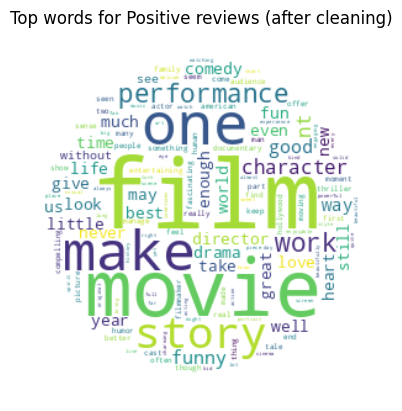

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=mask
)

wc.generate(' '.join(text for text in X_train_df[X_train_df['sentiment'] == 'Positive']['clean']))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title('Top words for Positive reviews (after cleaning)')
plt.show()

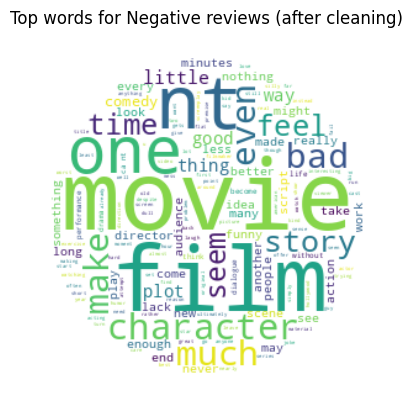

In [ ]:
wc.generate(' '.join(text for text in X_train_df[X_train_df['sentiment'] == 'Negative']['clean']))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title('Top words for Negative reviews (after cleaning)')
plt.show()

If you think lemmatization, stemming and other text preprocessing should be performed, code here. You can also go back and include it in the preprocessing function if you want.

You are also free to include any extra features that you extract from the text to aid in modeling (Optional)

In [83]:
# this stemming function is being used in the preprocessing function!!
def stem_fun(text_in):
    from nltk.stem import PorterStemmer
    ps = PorterStemmer()
    sent = [ps.stem(word) for word in text_in.lower(
        ).split()]
    sent = ' '.join(sent)
    return sent

##3. Fit model on preprocessed data and save preprocessor function and model


In [60]:
# Code Random Forest model [1 Pts]
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
train_input = tfidf.fit_transform(preprocessor(X_train))


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_input, y_train_labels)

RandomForestClassifier(random_state=42)

#### Save preprocessor function to local "preprocessor.zip" file

In [61]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [62]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

test_dtm = tfidf.transform(preprocessor(X_test))
feature_count = test_dtm.shape[1]
initial_type = [('float_input', FloatTensorType([None, feature_count]))]

onnx_model = model_to_onnx(rf_classifier, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [65]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this Movie Review Playground

set_credentials(apiurl=apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [ ]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1:

#-- Generate predicted values (a list of predicted labels "positive" or "negative") (Model 1)
#test_dtm = tfidf.transform(preprocessor(X_test))
predicted_labels = rf_classifier.predict(test_dtm)

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = "model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=predicted_labels)

Insert search tags to help users find your model (optional): ajh2259model1
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 495

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## 5. Repeat submission process to improve place on leaderboard


In [ ]:
# Train and submit model 2 using same preprocessor
from sklearn.ensemble import RandomForestClassifier

# Re fit a better RF model
rf_classifier_2 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=417)

rf_classifier_2.fit(train_input, y_train_labels)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=417)

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# complete as before

onnx_model = model_to_onnx(rf_classifier_2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2:

#-- Generate predicted values (a list of predicted labels "positive" or "negative") (Model 2)
predicted_labels_2 = rf_classifier_2.predict(test_dtm)

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model = "model2.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=predicted_labels_2)

Insert search tags to help users find your model (optional): ajh2259model2
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 496

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [ ]:
# Compare two or more models
data=mycompetition.compare_models([1,2], verbose=1)
mycompetition.stylize_compare(data)

In [ ]:
# Submit a third model using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_classifier_3 = RandomForestClassifier(random_state=417)
rf_random = RandomizedSearchCV(estimator = rf_classifier_3, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=417, n_jobs = -1)
rf_random.fit(train_input, y_train_labels)

rf_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': True}

In [ ]:
# Do grid search over atleast 2 hyperparams of RF and get your best model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [3, 5, 10],
    'n_estimators': [200, 500, 1000, 1200]
}

rf_classifier_3 = RandomForestClassifier(random_state=417)
grid_search = GridSearchCV(estimator=rf_classifier_3, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_input, y_train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=417),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [200, 500, 1000, 1200]})

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best parameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score:  0.7393063583815029


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx


# complete

onnx_model = model_to_onnx(best_model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3:

predicted_labels_3 = best_model.predict(test_dtm)

# Submit Model 3 to Competition Leaderboard
mycompetition.submit_model(model = "gridmodel.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=predicted_labels_3)

Insert search tags to help users find your model (optional): ajh2259model3
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 497

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
# Compare two or more models
data=mycompetition.compare_models([1, 2, 3], verbose=1)
mycompetition.stylize_compare(data)

In [70]:
# model 4 = Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
train_input = tfidf.fit_transform(preprocessor(X_train))


gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(train_input, y_train_labels)

GradientBoostingClassifier(random_state=42)

In [64]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

test_dtm = tfidf.transform(preprocessor(X_test))
feature_count = test_dtm.shape[1]
initial_type = [('float_input', FloatTensorType([None, feature_count]))]

onnx_model = model_to_onnx(gb_classifier, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [66]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [67]:
#Submit Model Gradient Boosting Classifier:

predicted_labels = gb_classifier.predict(test_dtm)

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = "model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=predicted_labels)

Insert search tags to help users find your model (optional): ajh2250GradBoost
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 555

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [71]:
# model 5 = Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dectree_classifier = DecisionTreeClassifier(random_state=42)
dectree_classifier.fit(train_input, y_train_labels)

DecisionTreeClassifier(random_state=42)

In [72]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

test_dtm = tfidf.transform(preprocessor(X_test))
feature_count = test_dtm.shape[1]
initial_type = [('float_input', FloatTensorType([None, feature_count]))]

onnx_model = model_to_onnx(dectree_classifier, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [73]:
#Submit Model Decision Tree Classifier:

predicted_labels = dectree_classifier.predict(test_dtm)

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = "model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=predicted_labels)

Insert search tags to help users find your model (optional): ajh2259DecTree
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 557

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


In [74]:
# model 6 = Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bag_classifier = BaggingClassifier(random_state=42)
bag_classifier.fit(train_input, y_train_labels)

BaggingClassifier(random_state=42)

In [75]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

test_dtm = tfidf.transform(preprocessor(X_test))
feature_count = test_dtm.shape[1]
initial_type = [('float_input', FloatTensorType([None, feature_count]))]

onnx_model = model_to_onnx(bag_classifier, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [76]:
#Submit Model Bagging Classifier:

predicted_labels = bag_classifier.predict(test_dtm)

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = "model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=predicted_labels)

Insert search tags to help users find your model (optional): ajh2259BagClass
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 558

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:2763


Tabularize your results and compare them here:

In [77]:
# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

In [79]:
tabular = data[["model_type", "accuracy", "f1_score", "precision", "recall", "num_params", "username", "version"]]
tabular_group = tabular[tabular["version"].isin([495,496,497,555,557,558])]
tabular_group

model_type  accuracy  f1_score  precision    recall  \
300      RandomForestClassifier  0.738749  0.738635   0.739211  0.738772   
301      RandomForestClassifier  0.738749  0.738746   0.738767  0.738753   
328           BaggingClassifier  0.717892  0.717887   0.717919  0.717898   
385      DecisionTreeClassifier  0.678375  0.678337   0.678442  0.678364   
396  GradientBoostingClassifier  0.658617  0.645692   0.686146  0.658827   
457      RandomForestClassifier  0.530187  0.402605   0.713579  0.530695   

     num_params username  version  
300         NaN  ajh2259      497  
301         NaN  ajh2259      495  
328         NaN  ajh2259      558  
385         NaN  ajh2259      557  
396         NaN  ajh2259      555  
457         NaN  ajh2259      496

Discuss which models performed better and why [1 Pts]

After experimenting with the six different models (three from RandomForestClassifier and three from other packages), the Random Forest Classifier Models with bootstrapping, 10 splits, and 200 estimators performed best, garnering accuracy, F1 Score, precision and recall of ~74%. This is most likely because this model was tuned with CV GridSearch to isolate the best performing hyperparameters in the model.